# Classification of whether an Image of Cell is Infected with Malaria or Not


In this notebook, I will build a Convolution Neural Network ML Model that will be able to predict with a certain amount of accuracy whether or not an image of a cell has been infected with Malaria or not. I will then deploy the final model using Google Cloud Platform's App Engine.


### About Malaria:

Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable.

In 2017, there were an estimated 219 million cases of malaria in 90 countries.

Malaria deaths reached 435,000 in 2017.

The WHO African Region carries a disproportionately high share of the global malaria burden. In 2017, the region was home to 92% of malaria cases and 93% of malaria deaths.

Malaria is caused by Plasmodium parasites. The parasites are spread to people through the bites of infected female Anopheles mosquitoes, called "malaria vectors." There are 5 parasite species that cause malaria in humans, and 2 of these species – P. falciparum and P. vivax – pose the greatest threat.

**Diagnosis of malaria can be difficult:**

Where malaria is not endemic any more (such as in the United States), health-care providers may not be familiar with the disease. Clinicians seeing a malaria patient may forget to consider malaria among the potential diagnoses and not order the needed diagnostic tests. Laboratorians may lack experience with malaria and fail to detect parasites when examining blood smears under the microscope.

Malaria is an acute febrile illness. In a non-immune individual, symptoms usually appear 10–15 days after the infective mosquito bite. The first symptoms – fever, headache, and chills – may be mild and difficult to recognize as malaria. If not treated within 24 hours, P. falciparum malaria can progress to severe illness, often leading to death.

**Microscopic Diagnosis**

Malaria parasites can be identified by examining under the microscope a drop of the patient’s blood, spread out as a “blood smear” on a microscope slide. Prior to examination, the specimen is stained to give the parasites a distinctive appearance. This technique remains the gold standard for laboratory confirmation of malaria. However, it depends on the quality of the reagents, of the microscope, and on the experience of the laboratorian.


#### Acknowledgements

This Dataset is taken from the official US National Library of Medicine's NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/. It is a repository of segmented cells from the thin blood smear slide images from the Malaria Screener research activity.

The dataset contains 27,558 color images and 2 folders - infected and uninfected.



## SUMMARY OF RESULTS:

Building a custom built 2-layered Convolution Neural Network provided fairly good results at 95% accuracy. F1 Score, Precision, and Recall were also at 95% for each giving us an equal and moderately low number of False Positives and False Negatives.

```
'ACCURACY SCORE:'
0.9508345428156749
'CLASSIFICATION REPORT:'
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2730
           1       0.95      0.95      0.95      2782

   micro avg       0.95      0.95      0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512
```

Our transfer learned model using VGG16 as our base model did not perform as well with an accuracy level at 91% and much more False Negatives than False Positives (a lower precision when stating if the cell was not infected with Malaria) which is very dangerous in medical diagnoses. This is to be expected since the classification of such images is so highly specific, building a custom built model would give much better accuracy.

In [1]:
# Common Imports:
import pandas as pd
import numpy as np
import os

# To allow markdowns in Python Cells:
from IPython.display import display, Markdown
# display(Markdown("# Hello World!"))

# To Plot Pretty Figures:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline 

# allowing for any single variable to print out without using the print statement:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### First, we will access our images and create our test and train X and Y values.

In [2]:
# Path to access images
from pathlib import Path

# in-built keras image pre-processing library
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
# Path to folders with training data
parasitized_path = Path('cell_images') / 'Parasitized'
not_parasitized_path = Path('cell_images') / 'Uninfected'

# making sure the directories exist
parasitized_path.is_dir()
not_parasitized_path.is_dir()

True

True

In [4]:
# initializing the lists of images (X) and labels (Y)
images = []
labels = []

In [5]:
# import library to resize images:
from skimage import transform

# setting the new shape of image:
new_shape = (50, 50, 3)

In [6]:
import warnings;
warnings.filterwarnings('ignore');

# Load all the non-malaria images and setting their Y label as 0
for img in not_parasitized_path.glob("*.png"):
    
    # Load the image from disk
    img = image.load_img(img)

    # Convert the image to a numpy array
    image_array = image.img_to_array(img)
    
    # resize the image (must be done after it has turned into a np array):
    image_array = transform.resize(image_array, new_shape, anti_aliasing=True)
    
    # scaling the image data to fall between 0-1 since images have 255 brightness values:
    image_array /= 255

    # Add the image to the list of images
    images.append(image_array)

    # For each 'not parasitized' image, the expected value should be 0
    labels.append(0)

Text(0.5, 1.0, 'Sample Uninfected Cell')

'Dimensions of image:'

(50, 50, 3)

'Images / Labels we have imported thus far:'

13779

13779

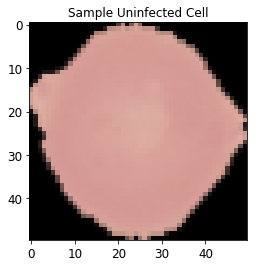

In [7]:
plt.imshow(images[0])
plt.title('Sample Uninfected Cell')
"Dimensions of image:"
images[0].shape

"Images / Labels we have imported thus far:"
len(images)
len(labels)

Let's now import all the infected images:

In [8]:
# Load all the malaria images and setting their Y label as 1
for img in parasitized_path.glob("*.png"):
    
    # Load the image from disk
    img = image.load_img(img)

    # Convert the image to a numpy array
    image_array = image.img_to_array(img)
    
    # resize the image (must be done after it has turned into a np array):
    image_array = transform.resize(image_array, new_shape, anti_aliasing=True)
    
    # scaling the image data to fall between 0-1 since images have 255 brightness values:
    image_array /= 255

    # Add the image to the list of images
    images.append(image_array)

    # For each 'parasitized' image, the expected value should be 1
    labels.append(1)

Let's take a look at an infected cell:

Text(0.5, 1.0, 'Sample Infected Cell')

'Dimensions of image:'

(50, 50, 3)

'Images / Labels we have imported thus far:'

27558

27558

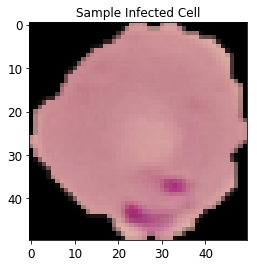

In [10]:
plt.imshow(images[-1])
plt.title('Sample Infected Cell')
"Dimensions of image:"
images[-1].shape

"Images / Labels we have imported thus far:"
len(images)
len(labels)

Here, we save and load the np data so we don't need to run through all the pre-processing from scratch next time.

In [11]:
# memory dump
import gc
gc.collect()

6210

Now, we randomly shuffle the images and labels (while respecting their order of course) before we split into training and testing sets:

In [12]:
from sklearn.utils import shuffle
images, labels = shuffle(images, labels)

'1 means it is infected:'

1

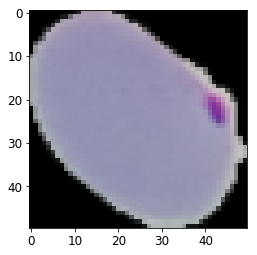

In [13]:
# checking to make sure that the order is still in place:
plt.imshow(images[-6])
"1 means it is infected:"
labels[-6]

In [14]:
# Create a single numpy array with all the images we loaded (list to np array)
x_data = np.array(images)

# Also convert the labels to a numpy array from a list
y_data = np.array(labels)

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0)

In [16]:
# type convert the test and training data:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [17]:
f'X_train shape: {X_train.shape}'
f'X_test.shape: {X_test.shape}'

'X_train shape: (22046, 50, 50, 3)'

'X_test.shape: (5512, 50, 50, 3)'

In [18]:
y_train[0:3]

array([0, 0, 1])

In [19]:
# one hot encoding Y:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
y_train[0:3]

array([[1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

# Building our Customized CNN Model

In [21]:
# importing the necessary Keras Tensorflow libraries:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [22]:
# defining and building our CNN Model, starting off with a Sequential ANN (CNN is a type of ANN):
mymodel = Sequential()

# Creating the CNN layers:
mymodel.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(50, 50, 3)))
mymodel.add(MaxPooling2D(pool_size=(2,2)))
mymodel.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
mymodel.add(MaxPooling2D(pool_size=(2,2)))
# flatten once exiting CNN layers:
mymodel.add(Flatten())
# set our classification ANN layer with unknown inputs. 128 is the number of neuron layers that is arbitrarily set
mymodel.add(Dense(128, activation='relu'))
# this dropout prevents overfitting.
mymodel.add(Dropout(0.5))
# set our classification ANN OUTPUT layer. 2 layer for binary classification - sigmoid for binary
mymodel.add(Dense(2, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
#   define compile to minimize categorical loss, use ada delta optimized, and optimize to maximizing accuracy
mymodel.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [24]:
#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch into the hist variable
#   arbitrary batch size and epochs
hist = mymodel.fit(X_train, y_train,
          batch_size=120,
          epochs=20,
          verbose=1,
          validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 22046 samples, validate on 5512 samples
Epoch 1/20
22046/22046 [==============================] - 45s 2ms/step - loss: 0.6780 - acc: 0.5705 - val_loss: 0.6840 - val_acc: 0.5330: 0.57
Epoch 2/20
22046/22046 [==============================] - 37s 2ms/step - loss: 0.5807 - acc: 0.6934 - val_loss: 0.3968 - val_acc: 0.8278
Epoch 3/20
22046/22046 [==============================] - 37s 2ms/step - loss: 0.2915 - acc: 0.8891 - val_loss: 0.2242 - val_acc: 0.9160 ETA: 7s - loss: 0.3064 - acc:  - ETA: 6s - loss: 0. - ETA: 2s - loss: 0.2957
Epoch 4/20
22046/22046 [==============================] - 36s 2ms/step - loss: 0.2066 - acc: 0.9249 - val_loss: 0.1891 - val_acc: 0.9351loss: 0.2049 - acc: 0 - ETA: 2s - loss: 0.2056 - ETA: 0s - loss: 0.2068 - acc: 0.924
Epoch 5/20
22046/22046 [==============================] - 37s 2ms/step - loss: 0.1860 - acc: 0.9313 - val_loss: 0.1917 - val_acc: 0.9280A: 26s - loss: 0.1839 - acc: 0. - ETA:  - ETA: 22s -

In [26]:
#   Evaluate the model with the test data
score = mymodel.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1532886670882096
Test accuracy: 0.9508345428156749


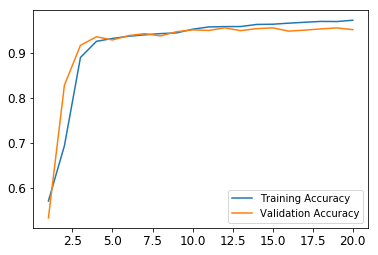

In [27]:
#   Plot data to see relationships in training and validation data
epoch_list = list(range(1, len(hist.history['acc']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [28]:
# summary about the model I built:
mymodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               495744    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [29]:
# Saving/loading whole models (architecture + weights + optimizer state) in one file:
mymodel.save('model_malaria.h5')

#### Load My Model Here:

In [32]:
# load model if necessary 
# start here without having to train it again:

# del mymodel
# gc.collect()
from keras.models import load_model
mymodel = load_model('model_malaria.h5')

91

In [33]:
# Do a prediction using my model and the X_Test Data
y_pred_mymodel = mymodel.predict(X_test)

In [34]:
# converting back to categorical values back from one-hot-encoding for Accuracy Metrics:
y_pred_mymodel = np.argmax(y_pred_mymodel, axis=1)
y_test = np.argmax(y_test, axis=1)

In [35]:
# See Accuracy Metrics of my custom model using the prediction values:

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# need to rescale it back before sending it to the accuracy score:
'ACCURACY SCORE:'
accuracy_score(y_test, y_pred_mymodel)

'CLASSIFICATION REPORT:' 
print(classification_report(y_test, y_pred_mymodel))

'ACCURACY SCORE:'

0.9508345428156749

'CLASSIFICATION REPORT:'

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2730
           1       0.95      0.95      0.95      2782

   micro avg       0.95      0.95      0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512



'CONFUSION MATRIX:'

'TRUE POSITIVES | FALSE NEGATIVES'

'FALSE POSITIVES | TRUE NEGATIVES'

(2640, 142)

(129, 2640)

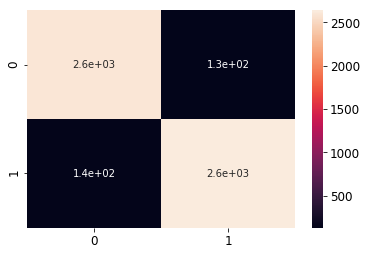

In [36]:
# the Confusion Matrix from scikit learn has predicted on side, actual on top, so it's confusing. Here, we unravel it into variables and print it out without confusion:
'CONFUSION MATRIX:'
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_mymodel).ravel()
'TRUE POSITIVES | FALSE NEGATIVES'
'FALSE POSITIVES | TRUE NEGATIVES'
tp, fn
fp, tp


# To Plot the Confusion Matrix:
import matplotlib.pyplot as plt
conf = confusion_matrix(y_test, y_pred_mymodel)
sns.heatmap(conf, annot=True)

# Comparing Accuracy Metrics of My Custom Model vs. Transfer Learning of VGG16 Keras Model.


So with my custom built model, I was able to get an accuracy of about 95% with a roughly equal and minimal amount of False Negatives and False Positives.

Let's see how our results compares with the best practice method of taking a highly cited pre-trained VGG16 model and retraining that CNN model with some new classifications for our Malaria vs Non-Malaria infected cell slides.

In [26]:
# imports:
from keras.applications import vgg16

In [27]:
# # Normalize image data to 0-to-1 range according to the VGG model
# X_train = vgg16.preprocess_input(X_train)
# X_test = vgg16.preprocess_input(X_test)

In [28]:
# Load a pre-trained neural network to use as a feature extractor. Removing the classification layer.
# include Top = False is important when we want to do transfer learning - because we want to introduce a NEW classification layer. We want to include a NEW Top layer.
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

In [29]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [30]:
# Define the layers in the new classification output ANN layer
x = base_model.output # take the output of convolution to x
x = Flatten()(x) # add flatten layer to x and passing it back to variable x (right to left)
x = Dense(120, activation='relu')(x) # new fully connected (dense) layer with 120 neurons
x = Dropout(0.5)(x)
predictions = Dense(2, activation='sigmoid')(x)  # new output layer

In [31]:
from keras.models import Model

# Define final trainable model which links input from the base model to the new classification prediction layers
transfer_model = Model(inputs=base_model.input, outputs=predictions)

In [32]:
# print model structure diagram - to see how it has changed with our layers added to this model
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [33]:
# Freeze all layers in the Inception V3 base model - it's important to freeze the convolution layers so they don't retrain.
for layer in base_model.layers:
    layer.trainable = False

In [34]:
# compiling our transfer_model with binary_crossentropy
transfer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# converting y_test back to hot-encoded so we can fit the transfer_model
y_test = to_categorical(y_test, 2)
y_test[0:3]

array([[1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [37]:
# creating a callback early_stop function:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [39]:
# Traain the transfer model using the same number of epochs and batch size as mymodel
history = transfer_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=120,
    validation_data=(X_test,y_test),
    callbacks=[early_stop]
)

Train on 22046 samples, validate on 5512 samples
Epoch 1/20
22046/22046 [==============================] - 983s 45ms/step - loss: 0.3435 - acc: 0.8549 - val_loss: 0.2913 - val_acc: 0.8759
Epoch 2/20
22046/22046 [==============================] - 965s 44ms/step - loss: 0.2838 - acc: 0.8823 - val_loss: 0.2611 - val_acc: 0.8915
Epoch 3/20
22046/22046 [==============================] - 994s 45ms/step - loss: 0.2614 - acc: 0.8930 - val_loss: 0.2432 - val_acc: 0.8964
Epoch 4/20
22046/22046 [==============================] - 998s 45ms/step - loss: 0.2474 - acc: 0.8985 - val_loss: 0.2449 - val_acc: 0.8939
Epoch 5/20
22046/22046 [==============================] - 991s 45ms/step - loss: 0.2406 - acc: 0.9021 - val_loss: 0.2321 - val_acc: 0.8981
Epoch 6/20
22046/22046 [==============================] - 897s 41ms/step - loss: 0.2326 - acc: 0.9052 - val_loss: 0.2265 - val_acc: 0.9028
Epoch 7/20
22046/22046 [==============================] - 613s 28ms/step - loss: 0.2269 - acc: 0.9076 - val_loss: 0.2

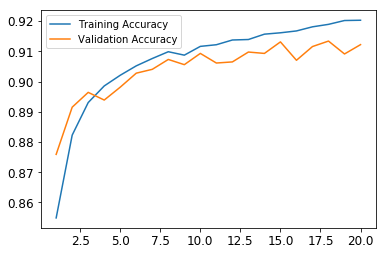

In [40]:
#   Plot data to see relationships in training and validation data
epoch_list = list(range(1, len(history.history['acc']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, history.history['acc'], epoch_list, history.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [41]:
# Saving/loading whole models (architecture + weights + optimizer state) in one file:
transfer_model.save('model_malaria_transfer.h5')

#### Load Transfer Model Here:

In [43]:
# load model if necessary 
# start here without having to train it again:

# del transfer_model
# gc.collect()
from keras.models import load_model
transfer_model = load_model('model_malaria_transfer.h5')

In [45]:
# Do a prediction using the model and the X_Test Data
y_pred_transfer = transfer_model.predict(X_test)

In [47]:
# converting back to categorical values back from one-hot-encoding for Accuracy Metrics:
y_pred_transfer = np.argmax(y_pred_transfer, axis=1)
y_test = np.argmax(y_test, axis=1)

In [49]:
# See Accuracy Metrics of my custom model using the prediction values:

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# need to rescale it back before sending it to the accuracy score:
'ACCURACY SCORE:'
accuracy_score(y_test, y_pred_transfer)

'CLASSIFICATION REPORT:' 
print(classification_report(y_test, y_pred_transfer))

'ACCURACY SCORE:'

0.9120101596516691

'CLASSIFICATION REPORT:'

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2757
           1       0.93      0.89      0.91      2755

   micro avg       0.91      0.91      0.91      5512
   macro avg       0.91      0.91      0.91      5512
weighted avg       0.91      0.91      0.91      5512



'CONFUSION MATRIX:'

'TRUE POSITIVES | FALSE NEGATIVES'

'FALSE POSITIVES | TRUE NEGATIVES'

(2450, 305)

(180, 2450)

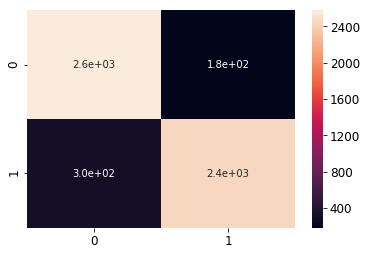

In [48]:
# the Confusion Matrix from scikit learn has predicted on side, actual on top, so it's confusing. Here, we unravel it into variables and print it out without confusion:
'CONFUSION MATRIX:'
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_transfer).ravel()
'TRUE POSITIVES | FALSE NEGATIVES'
'FALSE POSITIVES | TRUE NEGATIVES'
tp, fn
fp, tp


# To Plot the Confusion Matrix:
import matplotlib.pyplot as plt
conf = confusion_matrix(y_test, y_pred_transfer)
sns.heatmap(conf, annot=True)

## Conclusion:
As we can see, the results for the transfer learned model were much worse. Since these cellular images were so specific, it is best that we built our own custom model for this from scratch.